In [19]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

# Direct Methods for the solution of Linear Systems

## 1.
Given a matrix A ∈ R
n×n and the vector xtrue = (1, 1, . . . , 1)T ∈ R
n, write a script that:

- Computes the right-hand side of the linear system b = Axtrue.

- Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use
the ∞-norm instead of the 2-norm?

- Solves the linear system Ax = b with the function np.linalg.solve().

- Computes the relative error between the solution computed before and the true solution xtrue.
Remember that the relative error between xtrue and x in R
n can be computed as
$E(x_{true}, x) = \frac{|| x − x_{true}||_2}{||x_{true}||_2} $

- Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.


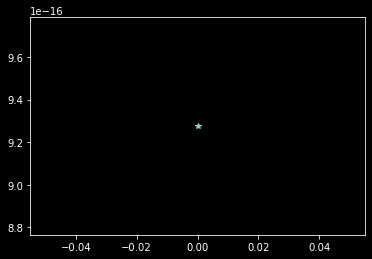

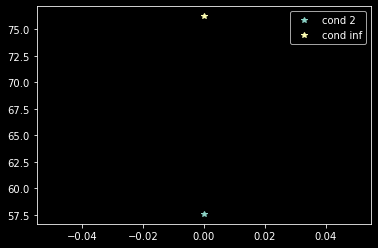

In [20]:
n = 10      # size of the matrix

x_true=np.ones(n)           # define the true x
A = np.random.rand(n,n)     #define the random transformation matrix

b=A@x_true                  # calculate the right-hand side

cond2=np.linalg.cond(A)        # calculate the condition number in 2 norm
condInf=np.linalg.cond(A,'f')   # calculate the condition number in inf norm

x=np.linalg.solve(A,b)      # solve the linear sistem

errors=np.linalg.norm(x-x_true)/np.linalg.norm(x_true)   # compute the relative error

plt.plot(errors,'*')    # plot the errors
plt.figure()
plt.plot(cond2,'*')     # plot cond 2
plt.plot(condInf,'*')   # plot cond inf
plt.legend(['cond 2','cond inf'])

From a single point it's hard to get any conclusion over the relationship between the condition number and the error.

---
## 2.
Test the program above with the following choices of A ∈ R
n×n:

- A random matrix (created with the function np.random.rand()) with size varying with n =
{10, 20, 30, . . . , 100}.

- The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the
vector x = {1, 2, 3, . . . , n}.

- The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, . . . , 12}.

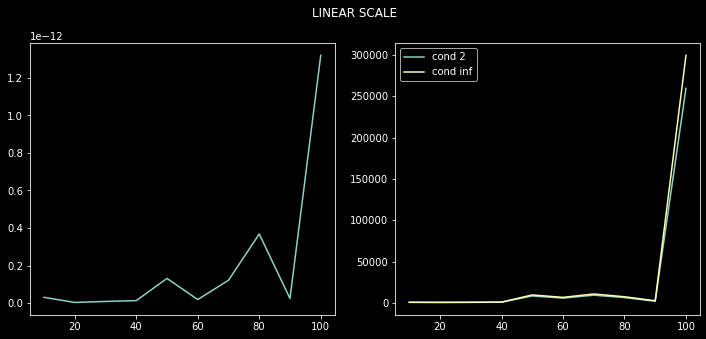

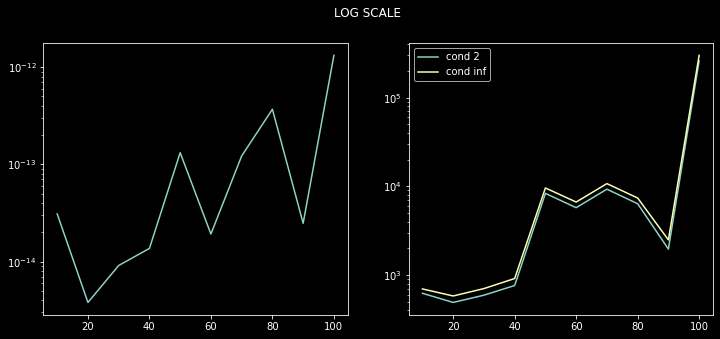

In [36]:
degree=[]       # initialize lists for the results
errors=[]
cond2=[]
condInf=[]

for i in range(10,101,10):

    degree.append(i)

    x_true=np.ones(i)           # define the true x
    A = np.random.rand(i,i)     #define the random transformation matrix

    b=A@x_true                  # calculate the right-hand side

    cond2.append(np.linalg.cond(A))         # calculate the condition number in 2 norm
    condInf.append(np.linalg.cond(A,'f'))   # calculate the condition number in inf norm

    x=np.linalg.solve(A,b)      # solve the linear sistem

    errors.append(np.linalg.norm(x-x_true)/np.linalg.norm(x_true))   # compute the relative error

plt.figure(figsize=(12, 5))
plt.suptitle('LINEAR SCALE')
plt.subplot(1,2,1)
plt.plot(degree,errors)     
plt.subplot(1,2,2)
plt.plot(degree,cond2)      
plt.plot(degree,condInf)    
plt.legend(['cond 2','cond inf'])

plt.figure(figsize=(12, 5))
plt.suptitle('LOG SCALE')
plt.subplot(1,2,1)
plt.yscale('log')
plt.plot(degree,errors)     
plt.subplot(1,2,2)
plt.yscale('log')
plt.plot(degree,cond2)      
plt.plot(degree,condInf)   
plt.legend(['cond 2','cond inf'])

What we can see from this plot is that the plot of the error roughly follows the plot of the contition number: the bigger spikes are alligned with big condition numbers. The relation is even more evident when plotted with a log scale in the y axis, where we can see this matching behaviour at all scales

It's also important to notice that, while the plots are similar, they are not exactly identical. The reasonf is well explained in the theory.

Let's analyze the formula for the relative error of the result

$$\frac{||\delta x||}{||x||} \leq \frac{K(A)}{1-K(A)\frac{||\delta A||}{||A||}}(\frac{||\delta A||}{||A||}+\frac{||\delta b||}{||b||})$$

but in our case we defined A, we know it without errors, so the formula becomes

$$\frac{||\delta x||}{||x||} \leq K(A)\frac{||\delta b||}{||b||}$$

The formula gives us only an upper bound for the error, not an accurate estimate of it. For this reason the plot of the error only roughly follows the one of the condition number.

Since we defined $x_{true}$ and $A$ the error on those is exaclty 0. Applying the linear transformation we start introducing rounding and algoritmic errors (remember that the subtraction can potentially destroy all the information through digit cancelation$^1$), but applying the summation in the right order $^2$ we can approximate the relative error on the result $b$ to be of the same order of magnitude of the machine precision.

<br>

Another thing to notice is the fact that generally the codition number increases with the size of the matrix.

<br>

<br>

**1**: The formula for the relative error of the sum/difference is

$$\frac{||\delta (a+b)||}{||a+b||}\leq \frac{||a||}{||a+b||} \frac{||\delta a||}{||a||}+\frac{||b||}{||a+b||}\frac{||\delta b||}{||b||}$$

It's evident that when a and b are *relatively* close the multiplication factor of the relative error can be arbitrarily big

**2**: In practice, often the order of the summation in matrix multiplication doesn't consider the values being summed for obvious performance reasons, but except very unlucky combination the information loss is negligible


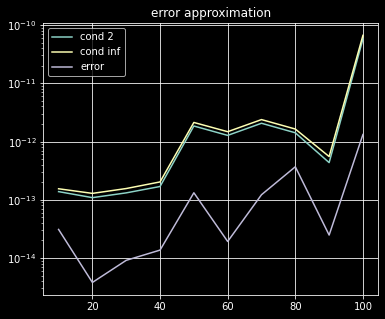

In [37]:
eps=np.finfo(float).eps

cond2=np.array(cond2)*eps
condInf=np.array(condInf)*eps

plt.figure(figsize=(6, 5))
plt.title('error approximation')
plt.yscale('log')
plt.grid()
plt.plot(degree,cond2)      
plt.plot(degree,condInf)  
plt.plot(degree,errors)      
plt.legend(['cond 2','cond inf','error'])

As we expected

$\frac{||\delta x||}{||x||} \leq K(A)\frac{||\delta b||}{||b||}$

is a pretty nice upper bound for the error. 

Anyway, if we use it as an extimation of the error it could be orders of magnitude greater than the real error. This is due to the fact that we overestimated the relative error on the input data as the machine precision $\epsilon$, but it could be much lower. In case the input data were machine-real number (they had exact rapresentation in our floating point system) the error on the input data $\frac{||\delta b||}{||b||}$ would be exactly zero, so there would be no error to amplificate (whitout considering the possible rounding error in the output)

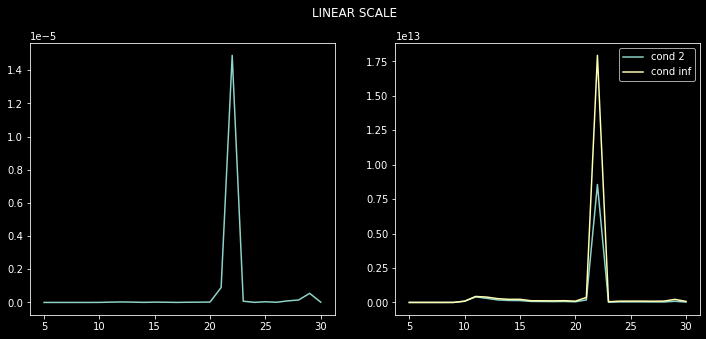

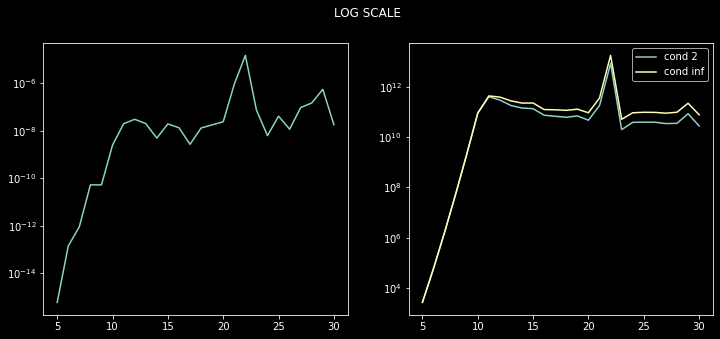

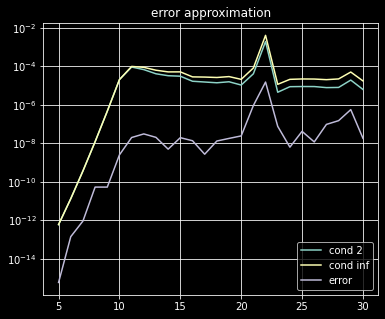

In [41]:
degree=[]       # initialize lists for the results
errors=[]
cond2=[]
condInf=[]

for i in range(5,31,1):

    degree.append(i)

    x_true=np.ones(i)         # define the true x

    v=np.arange(i)
    A = np.vander(v)     #define the random transformation matrix

    b=A@x_true                  # calculate the right-hand side

    cond2.append(np.linalg.cond(A))         # calculate the condition number in 2 norm
    condInf.append(np.linalg.cond(A,'f'))   # calculate the condition number in inf norm

    x=np.linalg.solve(A,b)      # solve the linear sistem

    errors.append(np.linalg.norm(x-x_true)/np.linalg.norm(x_true))   # compute the relative error

plt.figure(figsize=(12, 5))
plt.suptitle('LINEAR SCALE')
plt.subplot(1,2,1)
plt.plot(degree,errors)     
plt.subplot(1,2,2)
plt.plot(degree,cond2)      
plt.plot(degree,condInf)    
plt.legend(['cond 2','cond inf'])

plt.figure(figsize=(12, 5))
plt.suptitle('LOG SCALE')
plt.subplot(1,2,1)
plt.yscale('log')
plt.plot(degree,errors)     
plt.subplot(1,2,2)
plt.yscale('log')
plt.plot(degree,cond2)      
plt.plot(degree,condInf)   
plt.legend(['cond 2','cond inf'])

plt.figure(figsize=(6, 5))
plt.title('error approximation')
plt.grid()
plt.yscale('log')
eps=np.finfo(float).eps
plt.plot(degree,np.array(cond2)*eps)      
plt.plot(degree,np.array(condInf)*eps)  
plt.plot(degree,errors)      
plt.legend(['cond 2','cond inf','error'])

As we already discussed the condition number is an upper bound to the the increase of the relative error.

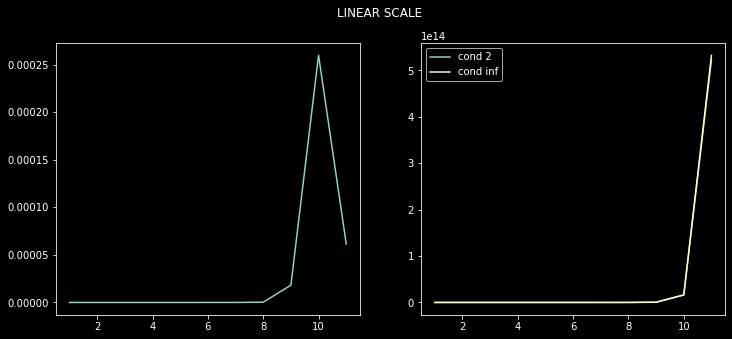

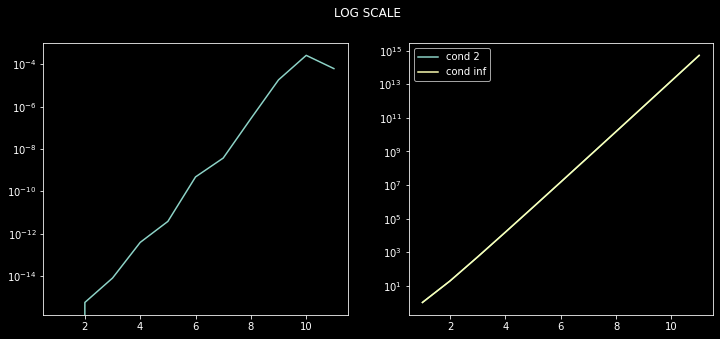

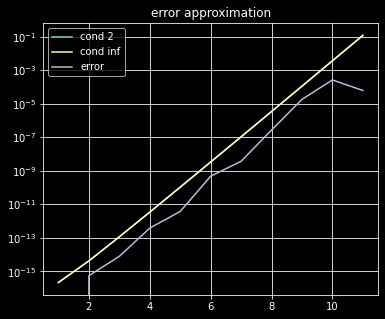

In [24]:
degree=[]       # initialize lists for the results
errors=[]
cond2=[]
condInf=[]

for i in range(1,12,1):

    degree.append(i)

    x_true=np.ones(i)         # define the true x
    A = scipy.linalg.hilbert(i)     #define the random transformation matrix

    b=A@x_true                  # calculate the right-hand side

    cond2.append(np.linalg.cond(A))         # calculate the condition number in 2 norm
    condInf.append(np.linalg.cond(A,'f'))   # calculate the condition number in inf norm

    x=np.linalg.solve(A,b)      # solve the linear sistem

    errors.append(np.linalg.norm(x-x_true)/np.linalg.norm(x))   # compute the relative error

plt.figure(figsize=(12, 5))
plt.suptitle('LINEAR SCALE')
plt.subplot(1,2,1)
plt.plot(degree,errors)     # plot the errors
plt.subplot(1,2,2)
plt.plot(degree,cond2)      # plot cond 2
plt.plot(degree,condInf)    # plot cond inf
plt.legend(['cond 2','cond inf'])

plt.figure(figsize=(12, 5))
plt.suptitle('LOG SCALE')
plt.subplot(1,2,1)
plt.yscale('log')
plt.plot(degree,errors)     
plt.subplot(1,2,2)
plt.yscale('log')
plt.plot(degree,cond2)     
plt.plot(degree,condInf)    
plt.legend(['cond 2','cond inf'])

plt.figure(figsize=(6, 5))
plt.title('error approximation')
plt.yscale('log')
plt.grid()
eps=np.finfo(float).eps
plt.plot(degree,np.array(cond2)*eps)      
plt.plot(degree,np.array(condInf)*eps)  
plt.plot(degree,errors)      
plt.legend(['cond 2','cond inf','error'])

---
# Floating Point Aritmetic

## 1.
 The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. Compute $\epsilon$, which
is defined as the smallest floating point number such that it holds:

$fl(1 + \epsilon) > 1$

Tips: use a while structure.

In [25]:
epsylon=np.asarray([1],np.float32)


while 1+epsylon>1:
    epsylon/=2

epsylon*=2      # it was half of the machine precision exiting the loop

print(f"Single precision: {epsylon[0]}")



epsylon=np.asarray([1],np.float64)

while 1+epsylon>1:
    epsylon/=2

epsylon*=2      

print(f"Double precision: {epsylon[0]}")

Single precision: 1.1920928955078125e-07
Double precision: 2.220446049250313e-16


As we have studied the single precision floating point rapresentation has 32 bits, and the machine precision is therefore

$$P_{single}=2^{-23}=1.1920928955078125e-07$$

the double precision floating point rapresentation has 32 bits, and the machine precision is

$$P_{double}=2^{-52}=2.220446049250313e-16$$

---
## 2.
Let’s consider the sequence $a_n=(1+1/n)^n$. It is well known that:

$\lim_{n \to \infty} a_n = e$

where e is the Euler costant. Choose different values for n, compute an and compare it to the real value of the Euler costant. What happens if you choose a large value of n? Guess the reason.

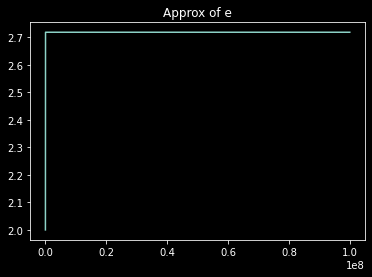

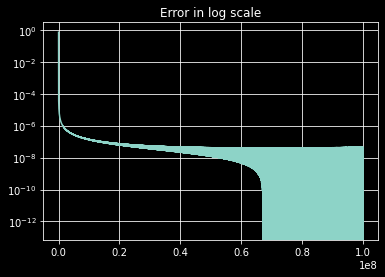

In [26]:
N=np.arange(1,100000000,200)     # initialize the array with all the values for n

d=1/N                    # calculate 1/n 

e_=np.power(d+1,N)       # calculate the power

plt.title('Approx of e')
plt.plot(N,e_)

plt.figure()

plt.title('Error in log scale')
plt.yscale("log")
plt.grid()
err=math.e-e_
plt.plot(N,err)

The approximation improves for small values of n, but when n increases the approximation start to oscillate and doesn't converge to the real value of $e$.

We can try plotting the last values to try to understand the behaviour of the approximation

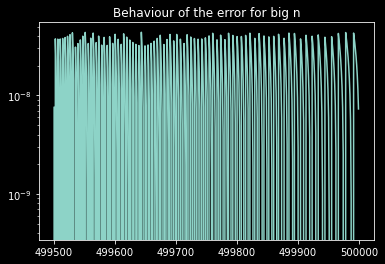

In [27]:
plt.title('Behaviour of the error for big n')
plt.yscale("log")
plt.plot(np.arange(len(err)-500,len(err)),err[-500:])

The extimation is ocillating but doesen't converge.

We can observe that, as in the case of the error of the linear system with the vandermonde matrix, the error 'settles' at a certain value (in this case keeps oscillating around a certain value). The most probable explaination is that the error on the estimation $a_k$ become so big that the error between our estimation and the real value of $e$ stopped decreasing.

<br>

We can test this ipothesis analitically.

<br>

Let's start by analyzing the error of the base $b=(1+\frac{1}{n})$: when we add $1/n$ to $1$ we have to approximate $1/n$ due to the fact that its scale it's way smaller than $1$. The absolute error of the sum will therefore be aproximately of the size of the Machine epsilon $\epsilon$, in this case $2^{-52}$ cause we are using double precision. 

Since 

$$(1+\frac{1}{n})\gtrsim 1$$

and also 

$$\lim_{n \to \infty}(1+\frac{1}{n})=1$$

 we can also approximate the relative error with the machine precision 
 
$$\frac{||\delta(1+\frac{1}{n})||}{||(1+\frac{1}{n})||}=2^{-52}$$

<br>

The power of a floating point number is calculated through the use of the Horner's scheme:

$$x^2=x*x$$

$$x^4=x^2*x^2$$

$$x^8=x^4*x^4$$

$$.....$$

For exponents combining that with the rapresentation of an integer number in base 2 we can write efficient algorithms that require a number of products equal to

$ c_n=2\,log_2n-1 $ 

<br>

The formula for the relative error of the product is

$$ \frac{||\delta xy||}{||xy||} \leq \frac{||\delta x||}{||x||}+\frac{||x+\delta x||}{||x||}\frac{||\delta y||}{||y||}$$

Since $\frac{||x+\delta x||}{||x||}\gtrsim 1 $ we can approximate it with $1$ knowing that we could be slightly underestimating the error. The formula then simplyfies and becomes

$$ \frac{||\delta xy||}{||xy||} \leq \frac{||\delta x||}{||x||}+\frac{||\delta y||}{||y||}$$

so squaring a floating point number roughly doubles the relative error.

In the horner scheme (ignoring the case of exponents that are not power of 2, that increases the number of operations and the relative error) squares the basis $log_2n$ times. The consequence of this is that the relative error of the basis is amplified by a factor $2^{log_2n}=n$.

Since the error between the numerical estimate $\widetilde{e}$ and the real value of $e$ is the sum of the error between the numerical estimate $\overline{e}$ and the theoretical estimate and the error between the theoretical estimate and the real value

$$(e-\widetilde{e})=(e-\overline{e})+(\overline{e}-\widetilde{e})$$

and, while the first decreases increasing $n$, the second error increases linearly with $n$, our estimate will have a value for which the error is at its minimum and then it will start increasing again.

<br>

we can visualize this by plotting the behaviour of the error in a bylogaritmic scale (lines in the linear scale are also lines in the bilinear scale)

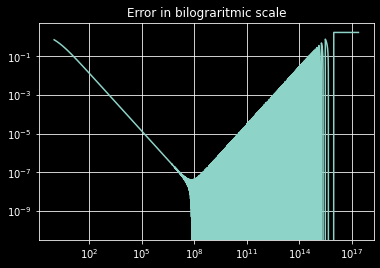

In [28]:
N=np.arange(1,40000)     # initialize the array with all the values for n

N=np.exp((N-len(N)%2)/1000)     #exponential spacing for a nice graph

d=1/N                    # calculate 1/n 

e_=np.power(d+1,N)       # calculate the power

plt.title('Error in bilograritmic scale')
plt.yscale("log")
plt.xscale("log")
plt.grid()
err=math.e-e_
plt.plot(N,err)

It's interesting that even in this case after the error increased to the point of completely destroying the estimation converges to $1$.
In this case it's probably approximating $(1+\frac{1}{n})\approx 1$

---
## 3.
Let’s consider the matrices:

$A=\begin{pmatrix}
4 & 2\\
1 & 3
\end{pmatrix}
,\;
B=\begin{pmatrix}
4 & 2\\
2 & 1
\end{pmatrix}$

Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.

Tips: Please, have a look at np.linalg.

In [29]:
A=np.array([[4,2],[1,3]])


print(f"A={A}")
print()
Eig=np.linalg.eigvals(A)
print(f"Eigenvalues of A = {Eig}")
r=np.linalg.matrix_rank(A)
print(f"Rank of A = {r}")

print()
print()

B=np.array([[4,2],[2,1]])
print(f"B={B}")
print()

Eig=np.linalg.eigvals(B)
print(f"Eigenvalues of B = {Eig}")
r=np.linalg.matrix_rank(B)
print(f"Rank of B = {r}")

A=[[4 2]
 [1 3]]

Eigenvalues of A = [5. 2.]
Rank of A = 2


B=[[4 2]
 [2 1]]

Eigenvalues of B = [5. 0.]
Rank of B = 1


From the theory we know that $rank(A)$ is the number of linearly indipendent column (or rows) of $A$. The square matrix is said to be full rank if the rank is equal to the dimension of the matrix.

As we know, we can see the matrix $A$ as a linear transformation:
$$
\begin{pmatrix}
 &  & \\
 & A & \\
 &  & \\
\end{pmatrix}
\begin{pmatrix}
 \\
 x\\
 \\
\end{pmatrix}
=
\begin{pmatrix}
 | & |& &|\\
 a_1& a_2 &...& a_n\\
 | &| & &|\\
\end{pmatrix}
\begin{pmatrix}
 x_1\\
 x_2\\
 ..\\
 x_n\\
\end{pmatrix}
$$

we can see it as a linear combination of the column of $A$ given by the weights $x$. From this point of view it's evident that the space in which lies the image of the transformation is given by the $span(A)$. In particular, since there are $r=rank(A)$ linearly indipendent columns that space will have $k$ dimensions.

Since there are $r$ linearly indipendent column, there are also $k=n-r$ dimensions that can be written as a linear combination of the $k$ indipendent ones. For each of these columns we can therefore create a linear combination of the $r$ indipendent columns and that dependent columns that equals to the null vector $\vec{O}$. The vectors of the coefficients of these linear combinations have the property that $A \vec{x_i}=\vec{O}$. The subspace generated by these vectors is the kernel of the linear function $A$.

Since for each of these vectors we can rewrite the property as

$$A\vec{x_i} = 0\vec{x_i}$$

Which means that these vectors are not only a basis of the kernel space but also are eigenvectors associated with eigenvalue $0$. Ince these eigenvetors are linearly indipendent (we created them assigning a coefficient only to the $r$ indipendent columns and one of the $k$ dependent ones) their numer $k$ is equal to the dimension of the null subspace, equal to the number of null eigenvalues.

<br>

In conclusion the relation between the rank $r$ and the nuber of null eigenvalues $k$ is $n=r+k$, where $n$ is the dimension od the space.

<br>

We can show it with some other examples

In [30]:
A=np.array([[4,2,1],[4,2,2],[3,2,1]])
print(f"A={A}")
print()

Eig=np.linalg.eigvals(A)
print(f"Eigenvalues of A = {Eig}")
r=np.linalg.matrix_rank(A)
print(f"Rank of A = {r}")

A=[[4 2 1]
 [4 2 2]
 [3 2 1]]

Eigenvalues of A = [ 7.10116035  0.48252625 -0.58368661]
Rank of A = 3


In [31]:
B=np.array([[4,2,1],[4,2,2],[4,2,3]])
print(f"B={B}")
print()

Eig=np.linalg.eigvals(B)
print(f"Eigenvalues of B = {Eig}")
print("    (note the numerical error in te calculation)")

r=np.linalg.matrix_rank(B)
print(f"Rank of B = {r}")

B=[[4 2 1]
 [4 2 2]
 [4 2 3]]

Eigenvalues of B = [ 7.70156212e+00  1.29843788e+00 -1.67437237e-16]
    (note the numerical error in te calculation)
Rank of B = 2


In [32]:
C=np.array([[4,2,1],[8,4,2],[0,0,0]])
print(f"C={C}")
print()

Eig=np.linalg.eigvals(C)
print(f"Eigenvalues of C = {Eig}")
print("    (note the numerical error in te calculation)")

r=np.linalg.matrix_rank(C)
print(f"Rank of C = {r}")

C=[[4 2 1]
 [8 4 2]
 [0 0 0]]

Eigenvalues of C = [8.0000000e+00 8.8817842e-16 0.0000000e+00]
    (note the numerical error in te calculation)
Rank of C = 1


In [33]:
D=np.array([[0,0,0],[0,0,0],[0,0,0]])
print(f"D={D}")
print()

Eig=np.linalg.eigvals(D)

print("(obviously)")
print(f"Eigenvalues of D = {Eig}")
r=np.linalg.matrix_rank(D)
print(f"Rank of D = {r}")

D=[[0 0 0]
 [0 0 0]
 [0 0 0]]

(obviously)
Eigenvalues of D = [0. 0. 0.]
Rank of D = 0
